In [4]:
#지도 학습 : 분류(classification), 회귀(regression)

#회귀 : 연속적인 값을 추론, 타깃이 특정 클래스에 속하는게 아니라 연속성 있는 값을 가짐

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

dataset = datasets.load_boston()
X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler() # 데이터 범위 조정을 위한 표준화 객체 생성
scaler.fit(X_train) # 표준화객체 학습 => 학습 세트의 평균과 표춘 편찻값을 학습
X_train_std = scaler.transform(X_train) # 각각 표준화를 적용 => 데이터 변환
X_test_std = scaler.transform(X_test)

# 데이터 범위를 비슷하게 적용하는 것, '데이터 스케일링'
# 표준화 연산 : 각 데이터 값에서 해당 특성의 평균 값을 뺀 뒤 표준편차로 나눔

model = KNeighborsRegressor(n_neighbors = 5) # 이웃 모델 객체 생성 , 인접한 5개의 데이터
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score)
print(test_score)

0.8257131441924044
0.8083728505823057


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target

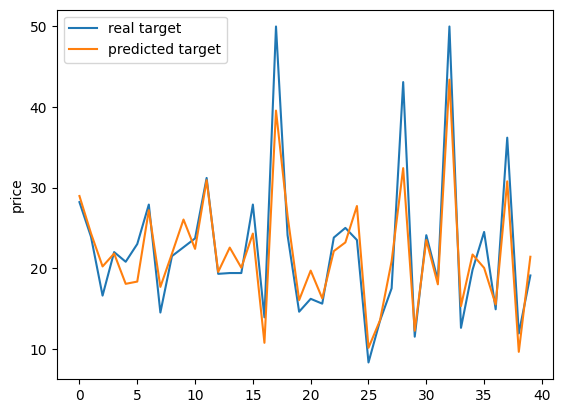

In [6]:
y_predicted = model.predict(X_test_std)

number_of_sample = 40
plt.plot(range(number_of_sample), y_test[:number_of_sample], label = 'real target')
plt.plot(range(number_of_sample), y_predicted[:number_of_sample], label = 'predicted target')
plt.ylabel('price')
plt.legend()
plt.show()

In [7]:
# 선형회귀 : 입력 데이터와 타깃 사이의 관계가 선형이라고 가정, 데이터의 관계 가장 잘 나타낸 직선 그린뒤, 직선을 바탕으로 새로운 입력 데이터에 대한 타깃을 추론
#쉽고 특성이 많은 데이터를 추론할 때 *일반화 성능* 이 뛰어남


# 직선이 얼마나 잘 그려진 상태인지 평가하기 위해 실제 타깃과 추론 타깃 사이의 오차를 이용해 계산

# 직선의 기울기 얼만큼씩 변화시킬 지 결정 => 학습률

In [10]:
# 로지스틱회귀

# 시그모이드라는 함수를 한번 더 이용하는 알고리즘

from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.array([[35], [50], [60], [65], [70], [85], [95]])
y = np.array([0, 0, 0, 0, 1, 1, 1])

model = LogisticRegression()
model.fit(X, y)

y_predicted = model.predict(X)
print(y_predicted)

X_test = np.array([[45], [55], [75]])
y_test_predicted = model.predict(X_test)
print(y_test_predicted)

[0 0 0 0 1 1 1]
[0 0 1]


In [12]:
dataset = datasets.load_breast_cancer()
X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(train_score)
print(test_score)

# 정확도 대신 재현율이라는 지표 사용


0.9906103286384976
0.9790209790209791


In [16]:
# 서포트 백터 머신  : 그룹 사이의 공간 , 마진을 최대화하는 경계를 찾는 알고리즘

from sklearn.svm import LinearSVC

dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearSVC(C=2.0)
model.fit(X_train_std, y_train)

train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(test_score)

# 비선형 분류 서포트 벡터 머

0.9736842105263158


In [18]:
from sklearn.preprocessing import RobustScaler # 이상치 영향을 적게 받는 로버스트 스케일링 방법
from sklearn.svm import SVC
# 로버스트 스케일링은 표준화와 비슷하지만 평균과 표준편차 대신 중앙값과 사분위수를 사용한다는 점이 다름
scaler = RobustScaler()
X_train_rbs = scaler.fit_transform(X_train)
X_test_rbs = scaler.transform(X_test)

print(X_train_rbs)
print(X_test_rbs)

model=SVC(kernel = 'rbf', gamma=1.0, C=1.0)
model.fit(X_train_rbs, y_train)

# 선형 서포트 벡터 머신 : 일반화 성능이 뛰어난 편
# 서포트 벡터 머신 : 비선형 결정 경계를 가질 수 있음

[[ 0.07142857  0.         -0.0137931   0.125     ]
 [ 0.         -0.8        -0.06896552 -0.0625    ]
 [ 0.71428571  0.          0.34482759  0.5       ]
 [-0.78571429  0.4        -0.8137931  -0.6875    ]
 [ 0.78571429  0.2         0.23448276  0.625     ]
 [-0.57142857  1.         -0.73103448 -0.4375    ]
 [-0.28571429  1.4        -0.75862069 -0.6875    ]
 [-0.57142857 -2.         -0.20689655 -0.1875    ]
 [ 0.5         0.          0.34482759  0.3125    ]
 [ 0.64285714  0.6         0.4         0.75      ]
 [ 0.14285714 -1.6         0.20689655  0.125     ]
 [ 0.64285714 -1.          0.42758621  0.3125    ]
 [-0.14285714 -1.         -0.09655172 -0.125     ]
 [ 1.35714286  0.          0.51034483  0.625     ]
 [ 0.35714286  0.6         0.12413793  0.1875    ]
 [-0.21428571 -1.2        -0.12413793 -0.125     ]
 [ 0.35714286 -0.6         0.17931034  0.3125    ]
 [ 0.35714286 -0.4         0.23448276  0.125     ]
 [-0.64285714 -1.          0.06896552  0.25      ]
 [ 0.35714286 -1.          0.20

SVC(gamma=1.0)

1.0
0.9736842105263158


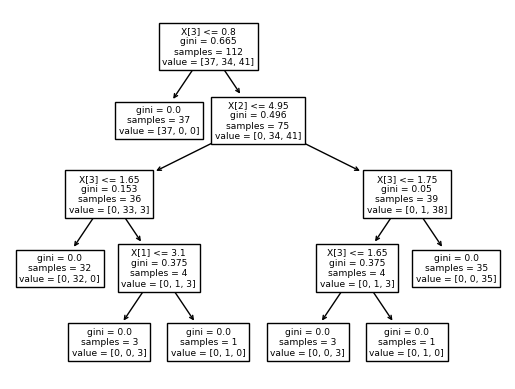

In [22]:
# 결정 트리

from sklearn.tree import DecisionTreeClassifier , plot_tree
import matplotlib.pyplot as plt

dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(test_score)

plot_tree(model)
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier

dataset = datasets.load_boston()
X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score)
print(train_score)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target

ValueError: Unknown label type: 'continuous'

In [29]:
# 랜덤 포레스트 : 결정 트리에 배깅 방식을 적용한 머신러닝 알고리즘
# 부트스트랩으로 만들어진 학습 데이터를 이용해 다양한 결정 트리를 만듬, 이를의 결과를 합산

# 배깅 방식 : 독립적인 머신러닝 모델을 여러 개 만들고 각 모델이 추론하는 결과를 합산
# 부트스트랩 : 데이터 샘플링 방식


# 그레이디언드 부스팅 
# 이전 모델의 오차를 보완하는 모델을 추가



# 나이브 베이즈 분류
# 텍스트 분류를 위해 사용하는 머신러닝 알고리즘


In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

news = datasets.fetch_20newsgroups()

X, y = news.data, news.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

vectorizer =TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB(alpha=0.01)
model.fit(X_train_vec, y_train)

train_score = model.score(X_train_vec, y_train)
test_score = model.score(X_test_vec, y_test)

print(train_score)
print(test_score)

0.9974071891573365
0.9105691056910569


In [37]:
# 비지도 학습 알고리즘

#  데이터 샘플 수는 적은데 특성이 너무 많으면 어떤 특성이 타깃에 영향을 미치는지 인과 관계 파악하기 어려움 => 차원의 저주

## 주성분 분석
# 특성이 많은 고차원 데이터에서 많은 정보를 잃지 않으면서 특성이 적은 저차원데이터를 만들어낼 수 있음

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


dataset = datasets.load_boston()

X, y = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=0.96)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_pca, y_train)
train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print(train_score)
print(test_score)

0.8209960301566517
0.8061452312883108


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target

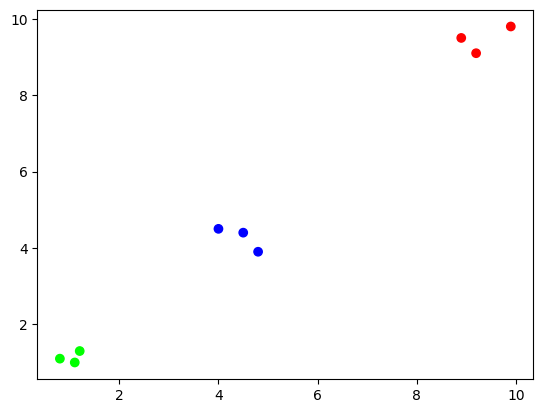

In [48]:
# 클러스터링
## 데이터의 유사성을 토대로 그룹을 지어 분류하는 비지도 학습 알고리즘


#k-평균 클러스터링 : 데이터 샘플을 비슷한 데이터끼리 묶어 K개의 클러스터로 분류하는 알고리즘

import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1.2, 1.3], [1.1, 1.0], [0.8, 1.1],
    [4.5, 4.4], [4.0, 4.5], [4.8, 3.9],
    [9.9, 9.8], [8.9, 9.5], [9.2, 9.1]
])

# plt.scatter(X[:, 0], X[:, 1])
# plt.show()
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='brg')
plt.show()

In [49]:
# k겹 교차 검증
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']
model = KNeighborsClassifier(n_neighbors=5)

score_list = cross_val_score(model, X, y, cv=5)




In [52]:
# 파이프라인 구성하기 : 전처리부터 모델 학습까지 과정을 하나로 통합하여 하나의 모델 다루듯 사용할 수 있음

from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

#=>
pipe = Pipeline[('scaler', RobustScaler()), ('estimator', SVC(kernel='rbf', gamma=1.0, C=1.0))]
pipe.fit(X_train, y_train)

train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

print(train_score)













TypeError: 'ABCMeta' object is not subscriptable

In [53]:
# 여러모델 결합하기

estimator_list = [('rf', RandomForestClassifier(n_estiators=50, max_depth=5)), 
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(C=1, gamma=1))
]
ensemble = VotingClassifier(estimators=estimator_list)
ensemble.fit(X, y)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
joblib 모듈 , 알고리즘 불러옴